In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df1a = pd.read_excel(r'D:\Professional\Home\Program Files\VS Code\chaatHub\CSVs\01-Jan-2022 From 30-Apr-2022.xlsx')
df1b = pd.read_excel(r'D:\Professional\Home\Program Files\VS Code\chaatHub\CSVs\01-May-2022 From 25-Aug-2022.xlsx')
df1c = pd.read_excel(r'D:\Professional\Home\Program Files\VS Code\chaatHub\CSVs\Aug.xlsx')
df1d = pd.read_excel(r'D:\Professional\Home\Program Files\VS Code\chaatHub\CSVs\Sep19.xlsx')

def cleanForSalesPrediction(df1):
    col = df1.loc[24:].values.tolist()
    df1 = df1.iloc[25:]
    df1 = df1.rename(columns=
    {
        'Bill Report Summary': 'SerialNo',
        'Unnamed: 1': 'BillNo',
        'Unnamed: 2': 'Date&Time',
        'Unnamed: 3': 'PaymentType',
        'Unnamed: 4':'SubTotal',
        'Unnamed: 5':'Tax',
        'Unnamed: 6':'ExCharges',
        'Unnamed: 7': 'Discount',
        'Unnamed: 8':'RoundOff',
        'Unnamed: 9':'NetTotal',
        'Unnamed: 10': 'Total',
        'Unnamed: 11': 'ItemName',
        'Unnamed: 12':'Quantity' ,
        'Unnamed: 13': 'Price',
        'Unnamed: 14': 'ItemWiseSale'   
    })
    df2 = df1.drop(columns=['PaymentType','Tax','ExCharges','Discount','RoundOff','NetTotal','ItemName','Quantity','Price','ItemWiseSale'],axis=1)
    df3 = df2.dropna(how='all',axis=0)
    df4 = df3.sort_values(['BillNo'],ascending=1)
    return df4


d:\Professional\University\Venv_311\venv311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\Professional\University\Venv_311\venv311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df3a = cleanForSalesPrediction(df1a)
df3b = cleanForSalesPrediction(df1b)
df3c = cleanForSalesPrediction(df1c)
df3d = cleanForSalesPrediction(df1d)

In [5]:
df4 = pd.concat([df3a,df3b,df3c,df3d],axis=0)
df4.drop_duplicates(inplace=True)
df4.duplicated().sum()
df4.reset_index(inplace=True,drop=True)

df5 = df4.copy()
df5[['date','time']] = df5['Date&Time'].str.split(" ",expand=True)
df5.drop(columns='Date&Time')

df6 = df5.copy()
df6.date =  pd.to_datetime(df6['date']) 

df7 = df6.copy()
df7['Total'] = df7['Total'].astype(float)
df7.drop(['SubTotal'],axis=1)

,SerialNo,BillNo,Date&Time,Total,date,time
0,5228,22010110000,01-Jan-2022 6:37:PM,155.0,2022-01-01,6:37:PM
1,5227,22010110001,01-Jan-2022 7:08:PM,50.0,2022-01-01,7:08:PM
2,5225,22010110002,01-Jan-2022 7:18:PM,40.0,2022-01-01,7:18:PM
3,5224,22010110003,01-Jan-2022 7:30:PM,80.0,2022-01-01,7:30:PM
4,5223,22010110004,01-Jan-2022 7:36:PM,90.0,2022-01-01,7:36:PM
...,...,...,...,...,...,...
13731,6,22083021351,30-Aug-2022 8:37:PM,30.0,2022-08-30,8:37:PM
13732,7,22083021352,30-Aug-2022 8:37:PM,160.0,2022-08-30,8:37:PM
13733,2,22083021353,30-Aug-2022 9:04:PM,90.0,2022-08-30,9:04:PM
13734,3,22083021354,30-Aug-2022 8:56:PM,365.0,2022-08-30,8:56:PM


In [15]:
df7

,SerialNo,BillNo,Date&Time,SubTotal,Total,date,time,Day
0,5228,22010110000,01-Jan-2022 6:37:PM,155.00,155.0,2022-01-01,6:37:PM,1
1,5227,22010110001,01-Jan-2022 7:08:PM,50.00,50.0,2022-01-01,7:08:PM,1
2,5225,22010110002,01-Jan-2022 7:18:PM,40.00,40.0,2022-01-01,7:18:PM,1
3,5224,22010110003,01-Jan-2022 7:30:PM,80.00,80.0,2022-01-01,7:30:PM,1
4,5223,22010110004,01-Jan-2022 7:36:PM,90.00,90.0,2022-01-01,7:36:PM,1
...,...,...,...,...,...,...,...,...
13731,6,22083021351,30-Aug-2022 8:37:PM,30.00,30.0,2022-08-30,8:37:PM,30
13732,7,22083021352,30-Aug-2022 8:37:PM,160.00,160.0,2022-08-30,8:37:PM,30
13733,2,22083021353,30-Aug-2022 9:04:PM,90.00,90.0,2022-08-30,9:04:PM,30
13734,3,22083021354,30-Aug-2022 8:56:PM,365.00,365.0,2022-08-30,8:56:PM,30


In [13]:
df8

,SerialNo,BillNo,SubTotal,date,Total,Date&Time,hours,minutes,amPm
0,5228,22010110000,155.00,2022-01-01,155.0,01-Jan-2022 6:37:PM,6,37,PM
1,5227,22010110001,50.00,2022-01-01,50.0,01-Jan-2022 7:08:PM,7,08,PM
2,5225,22010110002,40.00,2022-01-01,40.0,01-Jan-2022 7:18:PM,7,18,PM
3,5224,22010110003,80.00,2022-01-01,80.0,01-Jan-2022 7:30:PM,7,30,PM
4,5223,22010110004,90.00,2022-01-01,90.0,01-Jan-2022 7:36:PM,7,36,PM
...,...,...,...,...,...,...,...,...,...
13731,6,22083021351,30.00,2022-08-30,30.0,30-Aug-2022 8:37:PM,8,37,PM
13732,7,22083021352,160.00,2022-08-30,160.0,30-Aug-2022 8:37:PM,8,37,PM
13733,2,22083021353,90.00,2022-08-30,90.0,30-Aug-2022 9:04:PM,9,04,PM
13734,3,22083021354,365.00,2022-08-30,365.0,30-Aug-2022 8:56:PM,8,56,PM


In [6]:
df7['Day'] = df7['date'].dt.day
df7.shape
df8 = df7.iloc[:,[0,1,3,5,4,2]]
df8[['hours','minutes','amPm']] = df5['time'].str.split(":",expand=True)
df8.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16880\1064725697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8[['hours','minutes','amPm']] = df5['time'].str.split(":",expand=True)


,SerialNo,BillNo,SubTotal,date,Total,Date&Time,hours,minutes,amPm
0,5228,22010110000,155.00,2022-01-01,155.0,01-Jan-2022 6:37:PM,6,37,PM
1,5227,22010110001,50.00,2022-01-01,50.0,01-Jan-2022 7:08:PM,7,08,PM
2,5225,22010110002,40.00,2022-01-01,40.0,01-Jan-2022 7:18:PM,7,18,PM
3,5224,22010110003,80.00,2022-01-01,80.0,01-Jan-2022 7:30:PM,7,30,PM
4,5223,22010110004,90.00,2022-01-01,90.0,01-Jan-2022 7:36:PM,7,36,PM


In [7]:
df9 = df8.drop(['minutes','amPm','BillNo','Date&Time'], axis="columns")
df9.head()
df10 = df9.iloc[:,[0,1,3,2]]
# df10['Day'] = df10['Day'].astype(int)
# df10['hours'] = df10['hours'].astype(int)
df10['Total'] = df10['Total'].astype(int)
df10.info()
# df10.to_csv("YearMasterFeatuers.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13736 entries, 0 to 13735
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SerialNo  13736 non-null  object        
 1   SubTotal  13736 non-null  object        
 2   Total     13736 non-null  int32         
 3   date      13736 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(1), object(2)
memory usage: 375.7+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_16880\368943654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['Total'] = df10['Total'].astype(int)


<AxesSubplot: >

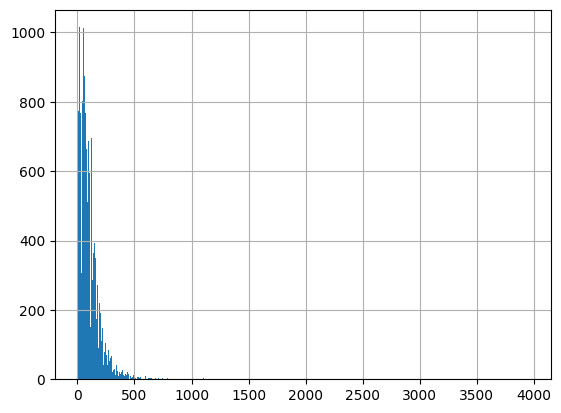

In [16]:
# df10.plot.scatter(x = 'hours', y = 'Day', s = 100)
df10.Total.hist(bins=500)
# df10.query('Total >= 1200')

(13736, 4)
(13678, 4)


<AxesSubplot: >

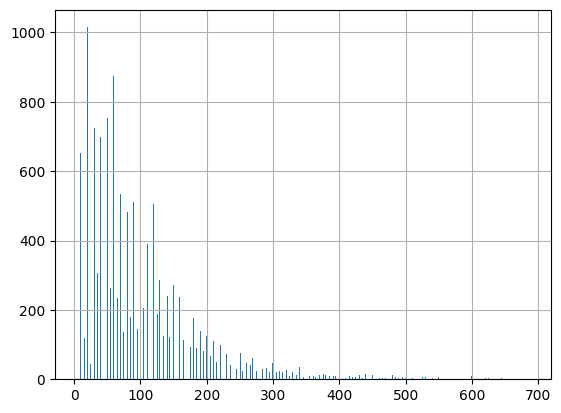

In [9]:
st = df10.Total.std()
m = df10.Total.mean()
rgm = round(st - m)
rgp = round(st + m)
df11 = (df10.query('Total >= 2 & Total <= 700'))
print(df10.shape)
print(df11.shape)
df11.Total.hist(bins=500)

In [10]:
# df11 = df11.drop(columns='logbase2', axis="column")
def rating(x):
    if x < 75:
        y = 1
    elif x >= 150:
        y = 3
    elif x >= 76 & x < 150:
        y = 2
    return y

In [17]:
df12 = df11.copy()
df12['Rating'] = df12.Total.apply(lambda x: rating(x))
df12.Rating = df12.Rating.astype('category')
df12.groupby('Rating').sum()
df12.head(10)

C:\Users\hp\AppData\Local\Temp\ipykernel_16880\3469553709.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df12.groupby('Rating').sum()


,SerialNo,SubTotal,Total,date,Rating
0,5228,155.00,155,2022-01-01,3
1,5227,50.00,50,2022-01-01,1
2,5225,40.00,40,2022-01-01,1
3,5224,80.00,80,2022-01-01,2
4,5223,90.00,90,2022-01-01,2
5,5222,60.00,60,2022-01-01,1
6,5226,300.00,300,2022-01-01,3
7,5220,50.00,50,2022-01-01,1
8,5217,110.00,110,2022-01-01,2
9,5219,60.00,60,2022-01-01,1
